In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

load dataset

In [2]:
df = pd.read_csv("IMDB-Movie-Data.csv")

Understand some basic information about the dataset and Inspect the dataframe Inspect the dataframe's columns, shapes, variable types etc.

In [6]:
df.size # number of elements

12000

In [7]:
df.shape # return a tuple representing the dimensionality

(1000, 12)

In [8]:
df.dtypes #Data types

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [10]:
df.columns  # list the columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [11]:
df.ndim # number of dimensions

2

In [12]:
df.describe() #generate descriptive statistics (for numeric columns only)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [15]:
df.info() # Dispaly all the index dtype and columns, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
for i in df['Genre'].values:
    print(i)

Top 5 Movies and it's directors

In [4]:
df.loc[:5,["Title","Director"]]

,Title,Director
0,Guardians of the Galaxy,James Gunn
1,Prometheus,Ridley Scott
2,Split,M. Night Shyamalan
3,Sing,Christophe Lourdelet
4,Suicide Squad,David Ayer
5,The Great Wall,Yimou Zhang


In [23]:
df.iloc[-10:8]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


retrive the rating of greater then ">6"

In [46]:
movie= df.loc[(df["Rating"]>6), ["Title", "Director", "Rating", "Year"]]
movie.head(8)

,Title,Director,Rating,Year
0,Guardians of the Galaxy,James Gunn,8.1,2014
1,Prometheus,Ridley Scott,7.0,2012
2,Split,M. Night Shyamalan,7.3,2016
3,Sing,Christophe Lourdelet,7.2,2016
4,Suicide Squad,David Ayer,6.2,2016
5,The Great Wall,Yimou Zhang,6.1,2016
6,La La Land,Damien Chazelle,8.3,2016
7,Mindhorn,Sean Foley,6.4,2016


In [41]:
# df[df["Rating"]>6].head()

Movies with 6+ Rating directed by Christopher Nolan

In [47]:
df.loc[(df["Director"]=="Christopher Nolan"), ["Title", "Director", "Rating", "Year"]]

,Title,Director,Rating,Year
36,Interstellar,Christopher Nolan,8.6,2014
54,The Dark Knight,Christopher Nolan,9.0,2008
64,The Prestige,Christopher Nolan,8.5,2006
80,Inception,Christopher Nolan,8.8,2010
124,The Dark Knight Rises,Christopher Nolan,8.5,2012


Mean Rating of Director

In [10]:
df.groupby("Director")["Rating"].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam Leon              6.50
Adam McKay             7.00
Adam Shankman          6.30
                       ... 
Xavier Dolan           7.55
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 644, dtype: float64

Movies released in 2015 with a rating of 6+

In [39]:
df[(df["Year"]==2015) & (df["Rating"]>=6)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
84,85,Furious Seven,"Action,Crime,Thriller",Deckard Shaw seeks revenge against Dominic Tor...,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...",2015,137,7.2,301249,350.03,67.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
950,951,Me and Earl and the Dying Girl,"Comedy,Drama","High schooler Greg, who spends most of his tim...",Alfonso Gomez-Rejon,"Thomas Mann, RJ Cyler, Olivia Cooke, Nick Offe...",2015,105,7.8,92076,6.74,74.0
967,968,The Walk,"Adventure,Biography,Crime","In 1974, high-wire artist Philippe Petit recru...",Robert Zemeckis,"Joseph Gordon-Levitt, Charlotte Le Bon,Guillau...",2015,123,7.3,92378,10.14,NaN
976,977,Dark Places,"Drama,Mystery,Thriller",Libby Day was only eight years old when her fa...,Gilles Paquet-Brenner,"Charlize Theron, Nicholas Hoult, Christina Hen...",2015,113,6.2,31634,NaN,39.0
984,985,Max,"Adventure,Family",A Malinois dog that helped American Marines in...,Boaz Yakin,"Thomas Haden Church, Josh Wiggins, Luke Kleint...",2015,111,6.8,21405,42.65,47.0


Number of movies released in each year

In [141]:
df.groupby("Year")["Year"].count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Year, dtype: int64

Number of movies in each year without Sorting

In [144]:
df.groupby("Year", sort = False)["Year"].count()

Year
2014     98
2012     64
2016    297
2015    127
2007     53
2011     63
2008     52
2006     44
2009     51
2010     60
2013     91
Name: Year, dtype: int64

Number of movies released in each year

In [48]:
df.groupby("Year")["Year"].count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Year, dtype: int64

Movies with 6+ Rating sorted by Year of release

In [51]:
movie.sort_values("Year")

,Title,Director,Rating,Year
593,She's the Man,Andy Fickman,6.4,2006
99,The Departed,Martin Scorsese,8.5,2006
221,Cars,John Lasseter,7.1,2006
935,Talladega Nights: The Ballad of Ricky Bobby,Adam McKay,6.6,2006
869,Mission: Impossible III,J.J. Abrams,6.9,2006
...,...,...,...,...
206,Raw (II),Julia Ducournau,7.5,2016
202,Snowden,Oliver Stone,7.3,2016
201,A Cure for Wellness,Gore Verbinski,6.5,2016
196,Hacker,Akan Satayev,6.3,2016


In [152]:
df.isnull().sum() #check missing values

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [55]:
#  mean , median and sum of the Director
df.groupby("Director")[["Rating", "Metascore"]].agg([np.mean, np.median, np.sum])

C:\Users\hp\AppData\Local\Temp\ipykernel_13272\2831552010.py:2: FutureWarning: The provided callable <function mean at 0x00000271826AF920> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("Director")[["Rating", "Metascore"]].agg([np.mean, np.median, np.sum])
C:\Users\hp\AppData\Local\Temp\ipykernel_13272\2831552010.py:2: FutureWarning: The provided callable <function median at 0x00000271827E1E40> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby("Director")[["Rating", "Metascore"]].agg([np.mean, np.median, np.sum])
C:\Users\hp\AppData\Local\Temp\ipykernel_13272\2831552010.py:2: FutureWarning: The provided callable <function sum at 0x00000271826AE840> is currently using SeriesGroupBy.sum. In a future version of panda

Rating              Metascore              
                      mean median   sum      mean median    sum
Director                                                       
Aamir Khan            8.50   8.50   8.5      42.0   42.0   42.0
Abdellatif Kechiche   7.80   7.80   7.8      88.0   88.0   88.0
Adam Leon             6.50   6.50   6.5      77.0   77.0   77.0
Adam McKay            7.00   6.80  28.0      65.5   65.0  262.0
Adam Shankman         6.30   6.30  12.6      64.0   64.0  128.0
...                    ...    ...   ...       ...    ...    ...
Xavier Dolan          7.55   7.55  15.1      61.0   61.0  122.0
Yimou Zhang           6.10   6.10   6.1      42.0   42.0   42.0
Yorgos Lanthimos      7.20   7.20  14.4      77.5   77.5  155.0
Zack Snyder           7.04   7.10  35.2      48.0   52.0  240.0
Zackary Adler         5.10   5.10   5.1      90.0   90.0   90.0

[644 rows x 6 columns]

In [11]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0%
Title - 0%
Genre - 0%
Description - 0%
Director - 0%
Actors - 0%
Year - 0%
Runtime (Minutes) - 0%
Rating - 0%
Votes - 0%
Revenue (Millions) - 13%
Metascore - 6%


In [29]:
# change the data type of column
df['Rating'] = df["Rating"].astype(int)


In [16]:
# Min rating
k =df[df['Rating']==df["Rating"].min()]
print(k)

     Rank           Title   Genre  \
829   830  Disaster Movie  Comedy   

                                           Description         Director  \
829  Over the course of one evening, an unsuspectin...  Jason Friedberg   

                                                Actors  Year  \
829  Carmen Electra, Vanessa Lachey,Nicole Parker, ...  2008   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
829                 87     1.9  77207               14.17       15.0  


In [31]:
# list of years in the dataset (1986-2016)
years = sorted(pd.unique(df['Year']))
years

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [49]:
avg = np.mean(df["Year"]==2006)

0.044

In [53]:
# Data Types for our columns

print(df.dtypes)

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                  int32
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object


In [39]:
# Are there any Outliers?

df.boxplot(column=['Rating'])

<Axes: >

In [41]:
df.drop_duplicates().head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6,393727,325.02,40.0


In [62]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,0.999074,0.260965,1.000000,0.725133,0.997302,0.186775,0.073782,0.208283,0.997961,0.702575,0.119306
Title,0.999074,1.000000,0.258787,0.999074,0.725195,0.996372,0.185502,0.074912,0.209216,0.997029,0.702761,0.118205
Genre,0.260965,0.258787,1.000000,0.260965,0.187380,0.265145,0.042549,0.049373,-0.006786,0.262271,0.201870,0.054010
Description,1.000000,0.999074,0.260965,1.000000,0.725133,0.997302,0.186775,0.073782,0.208283,0.997961,0.702575,0.119306
Director,0.725133,0.725195,0.187380,0.725133,1.000000,0.727832,-0.024374,0.014466,0.240068,0.724393,0.407920,0.144602
Actors,0.997302,0.996372,0.265145,0.997302,0.727832,1.000000,0.183971,0.071153,0.208308,0.995248,0.699075,0.118081
Year,0.186775,0.185502,0.042549,0.186775,-0.024374,0.183971,1.000000,0.020432,-0.086527,0.185857,0.260908,0.004607
Runtime (Minutes),0.073782,0.074912,0.049373,0.073782,0.014466,0.071153,0.020432,1.000000,0.045785,0.072564,0.018207,0.044576
Rating,0.208283,0.209216,-0.006786,0.208283,0.240068,0.208308,-0.086527,0.045785,1.000000,0.206887,0.025664,0.161625
Votes,0.997961,0.997029,0.262271,0.997961,0.724393,0.995248,0.185857,0.072564,0.206887,1.000000,0.703484,0.119907


In [61]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Rank       Rank                  1.000000
           Title                 0.999074
           Genre                 0.260965
           Description           1.000000
           Director              0.725133
                                   ...   
Metascore  Runtime (Minutes)     0.044576
           Rating                0.161625
           Votes                 0.119907
           Revenue (Millions)    0.078839
           Metascore             1.000000
Length: 144, dtype: float64


In [63]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Rating              Year                 -0.086527
Year                Rating               -0.086527
Director            Year                 -0.024374
Year                Director             -0.024374
Rating              Genre                -0.006786
                                            ...   
Genre               Genre                 1.000000
Title               Title                 1.000000
Rank                Description           1.000000
Revenue (Millions)  Revenue (Millions)    1.000000
Metascore           Metascore             1.000000
Length: 144, dtype: float64


In [64]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Revenue (Millions)  Actors                0.699075
Actors              Revenue (Millions)    0.699075
Description         Revenue (Millions)    0.702575
Revenue (Millions)  Rank                  0.702575
Rank                Revenue (Millions)    0.702575
Revenue (Millions)  Description           0.702575
                    Title                 0.702761
Title               Revenue (Millions)    0.702761
Votes               Revenue (Millions)    0.703484
Revenue (Millions)  Votes                 0.703484
Director            Votes                 0.724393
Votes               Director              0.724393
Director            Rank                  0.725133
Rank                Director              0.725133
Director            Description           0.725133
Description         Director              0.725133
Director            Title                 0.725195
Title               Director              0.725195
Actors              Director              0.727832
Director            Actors     

In [76]:
Actors_Rating_Sum = df.groupby("Actors")[["Rating"]].sum()
Actors_Rating_Sum.sort_values("Rating", ascending = False)[:15]
A_Sorted = Actors_Rating_Sum["Rating"].astype("int")
A_Sorted

Actors
Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani                          8
Aamir Khan, Madhavan, Mona Singh, Sharman Joshi                              8
Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,Sanya Malhotra                 8
Aaron Paul, Dominic Cooper, Imogen Poots, Scott Mescudi                      6
Aaron Poole, Kenneth Welsh,Daniel Fathers, Kathleen Munroe                   5
                                                                            ..
Zachary Gordon, Robert Capron, Rachael Harris,Steve Zahn                     6
Zoey Deutch, James Franco, Tangie Ambrose,Cedric the Entertainer             6
Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabriel Byrne                       5
Zoey Deutch, Nicholas Braun, Mateo Arias, Israel Broussard                   6
Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey Arend, Chloë Grace Moretz    7
Name: Rating, Length: 996, dtype: int32

count the rating of each Actor

In [77]:
CompanyGrossSum = df.groupby("Actors")[["Rating"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values("Rating", ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted["Rating"].astype('int64')
CompanyGrossSumSorted

Actors
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            15
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   13
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    12
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            11
Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine               9
Leonardo DiCaprio, Matt Damon, Jack Nicholson, Mark Wahlberg            8
Leonardo DiCaprio, Jonah Hill, Margot Robbie,Matthew McConaughey        8
Darsheel Safary, Aamir Khan, Tanay Chheda, Sachet Engineer              8
Darío Grandinetti, María Marull, Mónica Villa, Rita Cortese             8
Patrick Stewart, Ian McKellen, Hugh Jackman, James McAvoy               8
Joaquin Phoenix, Amy Adams, Scarlett Johansson,Rooney Mara              8
Prabhas, Rana Daggubati, Anushka Shetty,Tamannaah Bhatia                8
Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent                       8
Ralph Fiennes, F. Murray Abraha

In [81]:
df['Year'] = df['Year'].astype(str).str[:4]
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6,393727,325.02,40.0


In [84]:
data = df.groupby(['Title', 'Year'])[["Votes"]].sum()
data.head()

,,Votes
Title,Year,
(500) Days of Summer,2009,398972
10 Cloverfield Lane,2016,192968
10 Years,2011,19636
12 Years a Slave,2013,486338
127 Hours,2010,294010


In [85]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [95]:
CompanyGrossSum = df.groupby(['Director', 'Year'])[["Rating"]].sum()

SumSorted = CompanyGrossSum.sort_values(['Rating','Director', 'Year'], ascending = False)[:15]
SumSorted

,,Rating
Director,Year,
Mike Flanagan,2016,18
Clint Eastwood,2008,15
Robert Rodriguez,2007,14
Richard LaGravenese,2007,14
Phil Lord,2014,14
Peter Berg,2016,14
Denis Villeneuve,2013,14
Lars von Trier,2013,13
Jeff Nichols,2016,13


<Axes: >

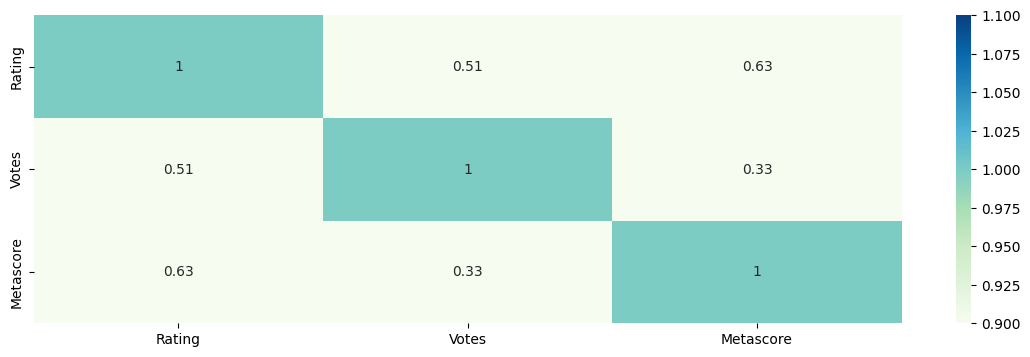

In [29]:
cor =df[['Rating','Votes','Metascore']].corr(method='pearson')

plt.figure(figsize=(14,4))
sns.heatmap(cor,vmin=1,vmax=1, cmap="GnBu", annot=True)